Importing Libaray

In [2]:
import pandas as pd


Load Dataset


In [74]:
df = pd.read_csv("sales_data_detailed.csv")


Print First 5 Data in the Dataset

In [33]:
print("First 5 rows:\n", df.head())

First 5 rows:
          Date Region     Product     Category  Units Sold   Discount  \
0  2019-01-01  North     Monitor       Office       434.0  26.110497   
1  2019-01-02   East  Smartwatch  Electronics       312.0  10.415180   
2  2019-01-03   West     Printer  Electronics       654.0  39.086913   
3  2019-01-04  South      Camera  Electronics       178.0  64.214423   
4  2019-01-05  North      Laptop  Accessories       416.0        NaN   

    Revenue      Cost     Sales  
0  110879.0  230147.0 -119268.0  
1   95629.0  211638.0 -116009.0  
2  120266.0   89257.0   31009.0  
3  193362.0   49070.0  144292.0  
4  279843.0    6166.0  273677.0  


Fill Missing Data (Mode of each column)

In [34]:
if df.isnull().values.any():
    print("\nNull values found:")
    print(df.isnull().sum())

    
    df = df.fillna(df.mode(numeric_only=True))
    print("\nMissing values filled with column mode.")
    
    df.to_csv('cleaned_sales_stats.csv', index=False)
    print("\n Cleaned dataset saved as 'cleaned_sales_stats.csv'")
else:
    print("\nNo null values found in the dataset.")
    


Null values found:
Date           0
Region         0
Product        0
Category       0
Units Sold    84
Discount      84
Revenue       84
Cost           0
Sales          0
dtype: int64

Missing values filled with column mode.

 Cleaned dataset saved as 'cleaned_sales_stats.csv'


Count Records by Region

In [4]:
region_count = df['Region'].value_counts()
print(region_count)


Region
North      282
East       241
Central    239
South      222
West       216
Name: count, dtype: int64


Filter Records — Revenue Between 50,000 and 150,000

In [35]:
filtered_data= df[(df['Revenue'] > 50000) & (df['Revenue'] < 150000)]
print(filtered_data)

            Date   Region     Product     Category  Units Sold   Discount  \
0     2019-01-01    North     Monitor       Office       434.0  26.110497   
1     2019-01-02     East  Smartwatch  Electronics       312.0  10.415180   
2     2019-01-03     West     Printer  Electronics       654.0  39.086913   
7     2019-01-08    South     Printer  Electronics       158.0  11.796025   
9     2019-01-10    North  Headphones         Home       246.0  22.970303   
...          ...      ...         ...          ...         ...        ...   
1191  2022-04-06    North     Printer         Home        81.0   2.800919   
1192  2022-04-07    South  Headphones       Office       737.0  23.261694   
1193  2022-04-08     East  Smartwatch         Home       798.0  32.938128   
1198  2022-04-13  Central      Tablet         Home       168.0        NaN   
1199  2022-04-14  Central      Laptop       Office        13.0  19.078335   

       Revenue      Cost     Sales  
0     110879.0  230147.0 -119268.0  
1

Remove Outliers — Discount Above 50%

In [36]:
df = df[df['Discount'] <= 50]
print(df)

            Date   Region     Product     Category  Units Sold   Discount  \
0     2019-01-01    North     Monitor       Office       434.0  26.110497   
1     2019-01-02     East  Smartwatch  Electronics       312.0  10.415180   
2     2019-01-03     West     Printer  Electronics       654.0  39.086913   
4     2019-01-05    North      Laptop  Accessories       416.0   0.237149   
6     2019-01-07     East      Tablet         Home       687.0   0.016861   
...          ...      ...         ...          ...         ...        ...   
1192  2022-04-07    South  Headphones       Office       737.0  23.261694   
1193  2022-04-08     East  Smartwatch         Home       798.0  32.938128   
1194  2022-04-09  Central      Laptop  Electronics       544.0  22.016230   
1195  2022-04-10    North     Printer  Electronics       365.0  49.013129   
1199  2022-04-14  Central      Laptop       Office        13.0  19.078335   

       Revenue      Cost     Sales  
0     110879.0  230147.0 -119268.0  
1

Increase All Revenue by 20%

In [27]:
df['Revenue'] = df['Revenue'] * 1.20
print(df['Revenue'])

0       159665.76
1       137705.76
2       173183.04
3       278441.28
4       402973.92
          ...    
1195    260982.72
1196    327142.08
1197    232423.20
1198    148030.56
1199    195863.04
Name: Revenue, Length: 1200, dtype: float64


Calculate Average Revenue by Product

In [7]:
avg_revenue = df.groupby('Product')['Revenue'].mean()
print(avg_revenue)


Product
Camera        153289.682927
Headphones    152809.298137
Laptop        158211.185484
Monitor       144491.647059
Phone         145961.077465
Printer       149308.950000
Smartwatch    160496.414966
Tablet        137946.636364
Name: Revenue, dtype: float64


Filter Records by Date Range (2021-01-01 to 2021-12-31)

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
filtered_date = df[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2021-12-31')]
print(filtered_date)

           Date   Region     Product     Category  Units Sold   Discount  \
731  2021-01-01     West       Phone       Office        13.0  15.391809   
732  2021-01-02    South       Phone  Electronics       200.0  25.781727   
733  2021-01-03     East      Laptop       Office       796.0  25.481923   
735  2021-01-05    North     Printer  Electronics       294.0  31.076147   
736  2021-01-06  Central       Phone  Accessories        65.0  46.785249   
...         ...      ...         ...          ...         ...        ...   
1088 2021-12-24    South      Camera         Home        20.0  47.487520   
1089 2021-12-25  Central      Laptop       Office         NaN  46.237269   
1090 2021-12-26     East       Phone       Office        60.0  43.024997   
1092 2021-12-28    South     Printer  Electronics       107.0  33.618685   
1094 2021-12-30     East  Headphones  Electronics       709.0  25.161152   

       Revenue      Cost     Sales  
731        NaN   29602.0  160807.0  
732   266484.

Calculate Sales Growth (Current Year / Previous Year)

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
sales_by_year = df.groupby(['Product', 'Year'])['Revenue'].sum().reset_index()
sales_by_year['Sales Growth'] = sales_by_year.groupby('Product')['Revenue'].pct_change() * 100
#print(sales_by_year)
print(sales_by_year['Sales Growth'])

0           NaN
1    -11.173643
2     21.030515
3    -85.289472
4           NaN
5     33.627592
6    -24.062175
7    -44.098290
8           NaN
9     -6.034746
10     6.734875
11   -72.932189
12          NaN
13    -7.826158
14    13.188221
15   -65.073074
16          NaN
17    -3.768061
18   -15.396621
19   -80.721141
20          NaN
21   -15.459592
22    31.382923
23   -68.698137
24          NaN
25    32.335843
26    16.941322
27   -76.234688
28          NaN
29    19.696533
30     9.679155
31   -80.964183
Name: Sales Growth, dtype: float64


Filter Records for 'North' Region

In [ ]:
north_sales = df[df['Region'] == 'North']
print(north_sales)

Visualize Total Sales Across Regions (Bar Chart)

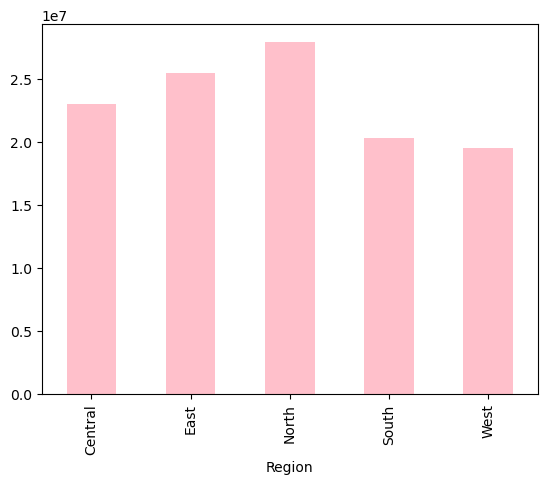

In [46]:
import matplotlib.pyplot as plt

region_sales = df.groupby('Region')['Revenue'].sum()
region_sales.plot(kind='bar', color='pink')
plt.xlabel='Region'
plt.ylabel='Total Sales'               
plt.title='Sales by Region'
plt.show()



Calculate Profit Margin (Revenue - Cost)

In [13]:
df['Profit Margin'] = df['Revenue'] - df['Cost']
print(df['Profit Margin'])

0      -119268.0
1      -116009.0
2        31009.0
3       144292.0
4       273677.0
          ...   
1195    160254.0
1196    226132.0
1197     22743.0
1198     61594.0
1199    119854.0
Name: Profit Margin, Length: 1200, dtype: float64


Replace Negative Sales Values with 0

In [ ]:
df['Sales'] = df['Sales'].apply(lambda x: 0 if x < 0 else x)
print(df['Sales'])

Visualize Top 10 Products by Revenue

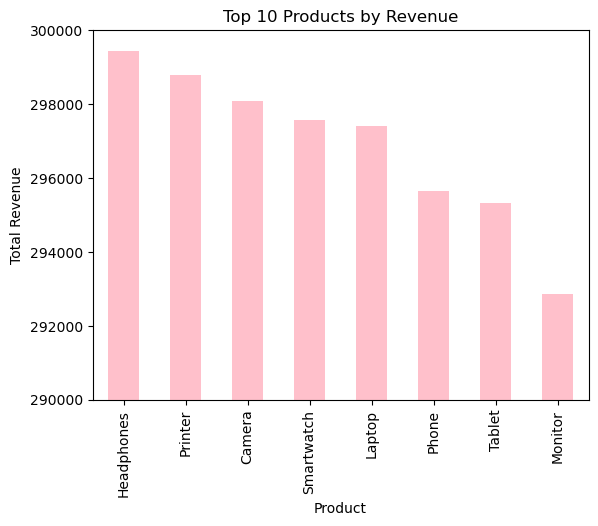

In [68]:
import matplotlib.pyplot as plt
##top10 = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
top10 = df.groupby('Product')['Revenue'].max().nlargest(10)

top10.plot(kind='bar',
           color='pink',
           xlabel='Product', 
           ylabel='Total Revenue', 
           title='Top 10 Products by Revenue')
plt.ylim(290000,300000)
plt.show()


Visualize Sales Trend Over Time (Monthly)

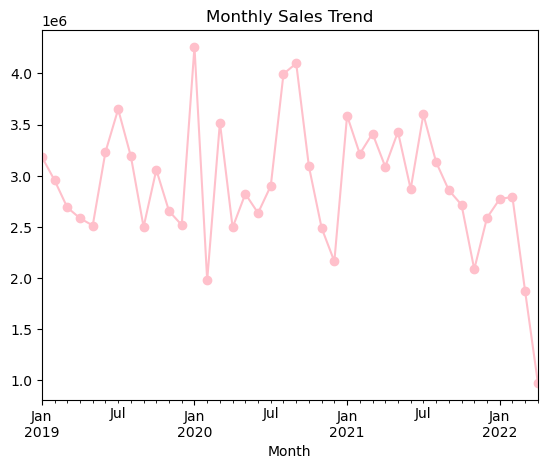

In [71]:
import matplotlib.pyplot as plt
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales.plot(kind='line',
                   color='pink', 
                   marker='o', 
                   title='Monthly Sales Trend')
plt.show()


Calculate Total Units Sold Per Product Category


In [20]:
units_per_category = df.groupby('Category')['Units Sold'].sum()
print(units_per_category)


Category
Accessories    65300.0
Electronics    72485.0
Home           72089.0
Office         71580.0
Name: Units Sold, dtype: float64
